## Customer Behavior Analysis
#### Customer behavior analysis focuses on understanding how customers interact with products or services. It involves studying purchasing habits, preferences, and decision-making patterns to identify trends and optimize engagement strategies.

## Product Performance
#### Product performance refers to the analysis of how individual products or categories contribute to sales and revenue. It evaluates metrics like sales volume, profitability, and customer feedback to identify high-performing and underperforming products.

## Seasonality and Trends
#### Seasonality and trends are patterns observed in time series data. Seasonality reflects regular, predictable fluctuations at fixed intervals, while trends represent the overall movement or direction of the data over time.

## Marketing and Revenue Insights
#### Marketing and revenue insights focus on analyzing the effectiveness of campaigns and their impact on revenue. This includes customer acquisition costs, sales contributions by channel, and the role of promotions in driving growth.

## Operational Insights Visualizations
#### Operational insights visualizations use data to illustrate key operational metrics. This includes inventory levels, supply chain efficiency, sales performance, and customer journey touchpoints, helping to optimize processes and decision-making.

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [5]:
# Load the dataset
data = pd.read_csv('shopping_trends_updated.csv')

In [6]:
# Display the first 5 rows
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# 1. Customer Behavior Analysis
Customer behavior analysis is a crucial aspect of understanding how customers interact with your business. It involves analyzing data from various sources, such as customer surveys, social media, and purchase history, to identify patterns and trends. This information can be used to create targeted marketing campaigns, improve customer service, and optimize the customer experience.

## 1.1 Peak Shopping Times


In [7]:
# Seasonal shopping trends
seasonal_trends = data['Season'].value_counts()
print(seasonal_trends)


Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64


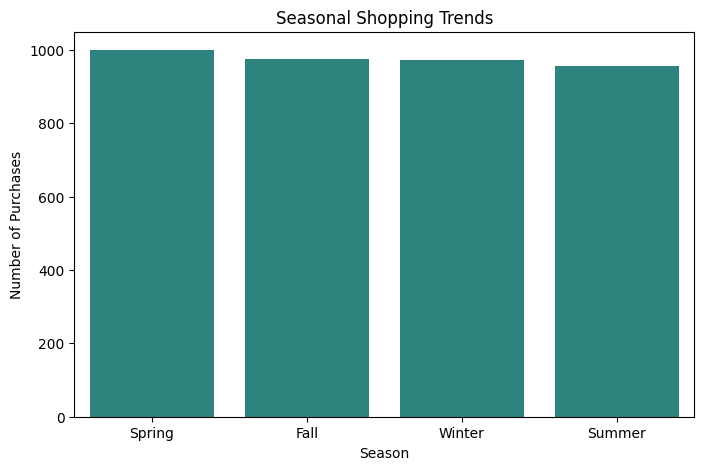

In [8]:
# Bar chart for seasonal shopping trends
seasonal_trends = data['Season'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_trends.index, y=seasonal_trends.values, color=sns.color_palette("viridis", n_colors=1)[0])
plt.title("Seasonal Shopping Trends")
plt.xlabel("Season")
plt.ylabel("Number of Purchases")
plt.show()


## 1.2 Gender distribution of customers

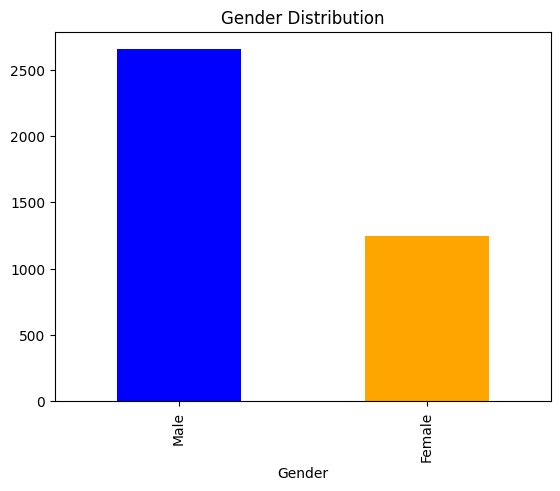

In [28]:
# gender distribution
data['Gender'].value_counts().plot(kind='bar', title='Gender Distribution', color=['blue', 'orange'])
plt.show()

## 1.3 Average Purchase Value per Customer

In [9]:
# Average purchase value
avg_purchase_per_customer = data.groupby('Customer ID')['Purchase Amount (USD)'].mean()
print(avg_purchase_per_customer)

Customer ID
1       53.0
2       64.0
3       73.0
4       90.0
5       49.0
        ... 
3896    28.0
3897    49.0
3898    33.0
3899    77.0
3900    81.0
Name: Purchase Amount (USD), Length: 3900, dtype: float64


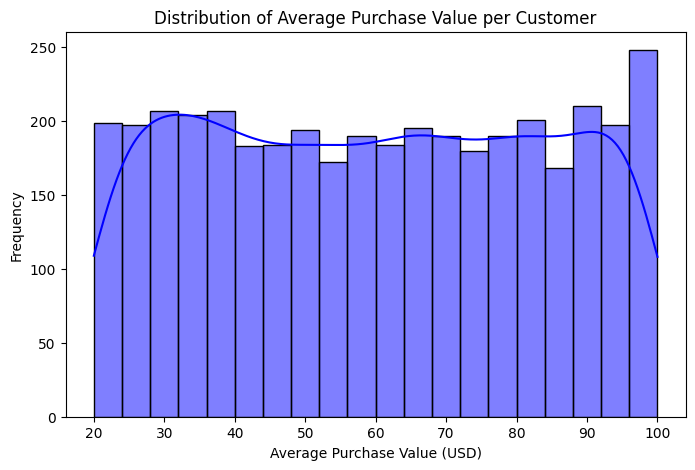

In [10]:
# Histogram of average purchase values
avg_purchase_per_customer = data.groupby('Customer ID')['Purchase Amount (USD)'].mean()
plt.figure(figsize=(8, 5))
sns.histplot(avg_purchase_per_customer, bins=20, kde=True, color="blue")
plt.title("Distribution of Average Purchase Value per Customer")
plt.xlabel("Average Purchase Value (USD)")
plt.ylabel("Frequency")
plt.show()

# Product Performance

## 2.1 Most Popular Product Categories

In [11]:
# Frequency of purchases
frequency_of_purchases = data['Frequency of Purchases'].value_counts()
print(frequency_of_purchases)

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


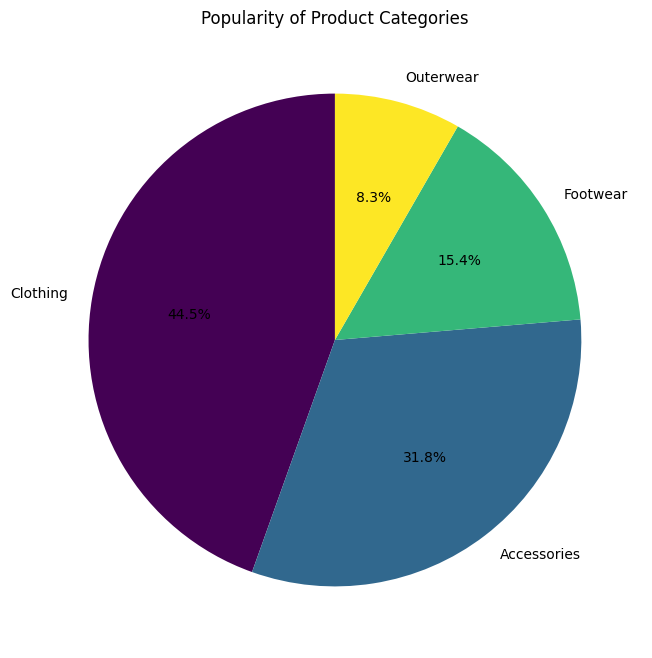

In [12]:
# Pie chart for popular product categories
popular_categories = data['Category'].value_counts()
plt.figure(figsize=(8, 8))
popular_categories.plot.pie(autopct='%1.1f%%', startangle=90, cmap="viridis")
plt.title("Popularity of Product Categories")
plt.ylabel("")
plt.show()

## 2.2 Impact of Discounts on Sales

In [13]:
# Analyze impact of discounts
discount_effect = data.groupby('Discount Applied')['Purchase Amount (USD)'].mean().reset_index()
print(discount_effect)

  Discount Applied  Purchase Amount (USD)
0               No              60.130454
1              Yes              59.279070


C:\Users\kumar\AppData\Local\Temp\ipykernel_8028\1957617813.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=data, palette="pastel")


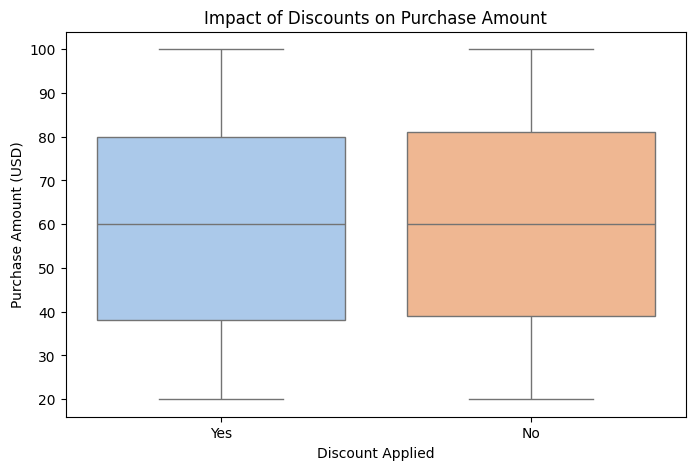

In [15]:
# Boxplot for sales with and without discounts
plt.figure(figsize=(8, 5))
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=data, palette="pastel")
plt.title("Impact of Discounts on Purchase Amount")
plt.xlabel("Discount Applied")
plt.ylabel("Purchase Amount (USD)")
plt.show()


# 3. Seasonality and Trends
Seasonality and trends are two types of patterns that can be observed in time series data. Seasonality refers to the regular fluctuations that occur at fixed intervals, such as daily, weekly, monthly, or yearly cycles. Trends, on the other hand, refer to the overall direction or movement of the data over time.

## 3.1 Seasonal Shopping Trends

In [16]:
# Total sales by season
sales_by_season = data.groupby('Season')['Purchase Amount (USD)'].sum()
print(sales_by_season)

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64


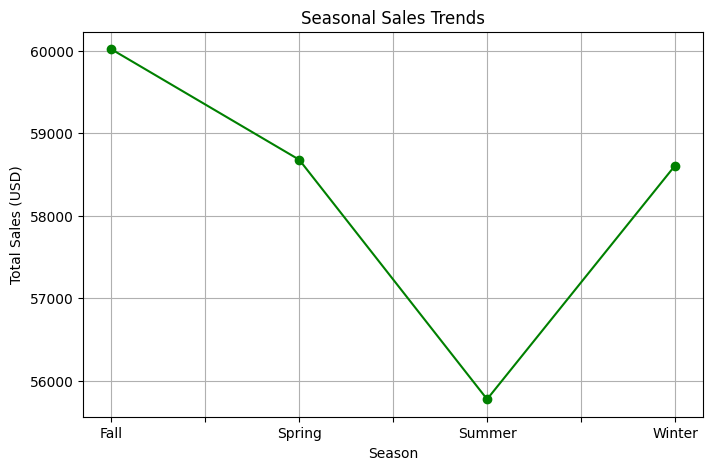

In [18]:
# Line plot for seasonal sales trends
sales_by_season = data.groupby('Season')['Purchase Amount (USD)'].sum()
plt.figure(figsize=(8, 5))
sales_by_season.plot(kind='line', marker='o', color='green')
plt.title("Seasonal Sales Trends")
plt.xlabel("Season")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()


# 4. Marketing and Revenue Insights

## 4.1 Popular Payment Methods

In [20]:
# Popular payment methods
payment_methods = data['Payment Method'].value_counts()
print(payment_methods)


Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


C:\Users\kumar\AppData\Local\Temp\ipykernel_8028\769531697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_methods.index, y=payment_methods.values, palette="coolwarm")


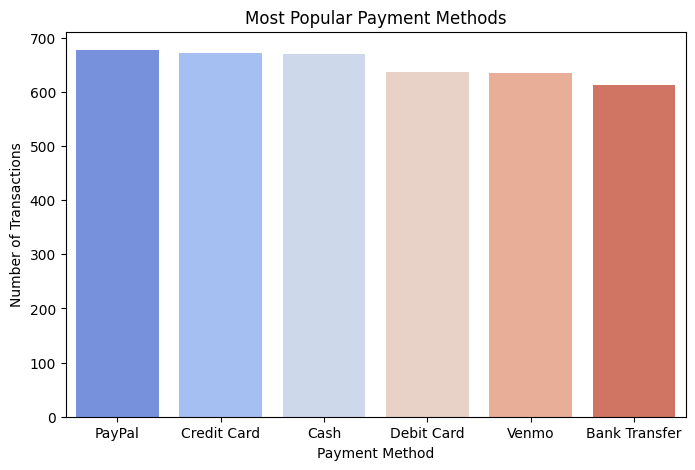

In [22]:
# Bar chart for payment methods
payment_methods = data['Payment Method'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_methods.index, y=payment_methods.values, palette="coolwarm")
plt.title("Most Popular Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.show()


## 4.2 Revenue by Subscription Status

In [23]:
# Revenue by subscription status
subscription_revenue = data.groupby('Subscription Status')['Purchase Amount (USD)'].sum().reset_index()
print(subscription_revenue)

  Subscription Status  Purchase Amount (USD)
0                  No                 170436
1                 Yes                  62645


C:\Users\kumar\AppData\Local\Temp\ipykernel_8028\927420251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subscription Status', y='Purchase Amount (USD)', data=subscription_revenue, palette="Blues")


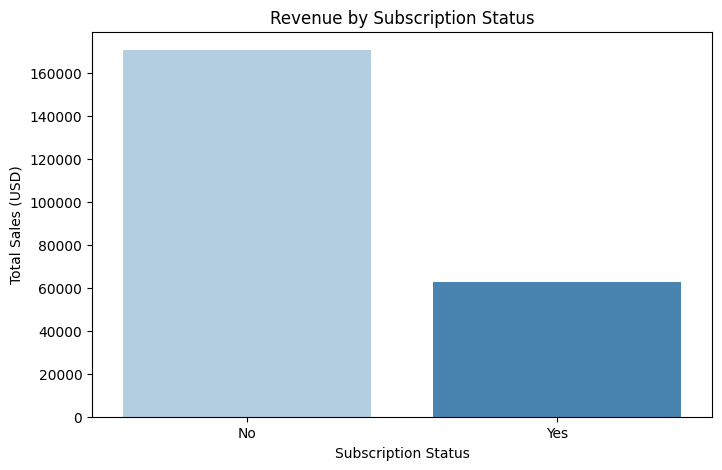

In [24]:
# Bar chart for subscription revenue
subscription_revenue = data.groupby('Subscription Status')['Purchase Amount (USD)'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Subscription Status', y='Purchase Amount (USD)', data=subscription_revenue, palette="Blues")
plt.title("Revenue by Subscription Status")
plt.xlabel("Subscription Status")
plt.ylabel("Total Sales (USD)")
plt.show()

## 4.3 Average order value per customer

In [35]:
# Calculate total revenue per customer and average it
customer_revenue = data.groupby('Customer ID')['Purchase Amount (USD)'].sum()
avg_order_value = customer_revenue.mean()
print(f'Average Order Value per Customer: {avg_order_value}')

Average Order Value per Customer: 59.76435897435898


# 5. Operational Insights Visualizations

## 5.1 Delivery Time Impact on Customer Satisfaction

In [25]:
# Impact of shipping type on satisfaction
shipping_satisfaction = data.groupby('Shipping Type')['Review Rating'].mean().reset_index()
print(shipping_satisfaction)


    Shipping Type  Review Rating
0  2-Day Shipping       3.761085
1         Express       3.776935
2   Free Shipping       3.717926
3    Next Day Air       3.720833
4        Standard       3.817737
5    Store Pickup       3.706462


C:\Users\kumar\AppData\Local\Temp\ipykernel_8028\2266114722.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shipping Type', y='Review Rating', data=shipping_satisfaction, palette="Greens")


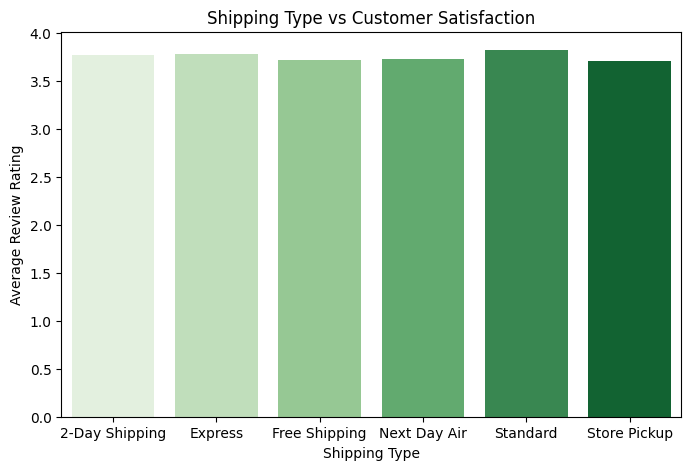

In [27]:
# Bar chart for shipping type and satisfaction
shipping_satisfaction = data.groupby('Shipping Type')['Review Rating'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Shipping Type', y='Review Rating', data=shipping_satisfaction, palette="Greens")
plt.title("Shipping Type vs Customer Satisfaction")
plt.xlabel("Shipping Type")
plt.ylabel("Average Review Rating")
plt.show()
